In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

## 데이터 만들기

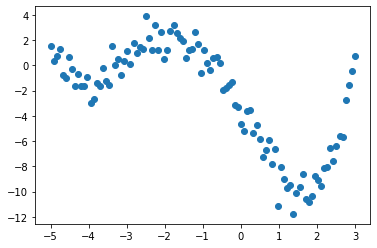

In [2]:
X=np.linspace(-5,3,100)
y=0.1*(X-3)*(X+3)*(X+1)*(X+5)+ np.random.normal(1,size=100)
plt.scatter(X,y)

## Cross Validate 사용

In [52]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression

reg=LinearRegression() #학습할 모형
kfold = KFold(n_splits=5, shuffle=True) #데이터 쪼갤 방식

# https://scikit-learn.org/stable/modules/model_evaluation.html
metrics = ['neg_mean_absolute_error','neg_mean_squared_error','r2'] # 교차검증하면서 기록할 평가지표

result=cross_validate(X=X.reshape(-1,1), #X데이터
                      y=y,#y데이터
                      estimator=reg, #학습시킬 모델
                      scoring=metrics, #평가할 지표
                      cv=kfold, # 교차검증 방식
                      return_train_score=True                      
                     )


In [53]:
# 딕셔너리에 키값으로 교차검증 결과가 저장되어있다.
result

{'fit_time': array([0.0021193 , 0.00096202, 0.00090313, 0.00098324, 0.00079513]),
 'score_time': array([0.0020473 , 0.00119805, 0.00118279, 0.0012269 , 0.00078177]),
 'test_neg_mean_absolute_error': array([-3.3161621 , -2.18241742, -2.92579413, -2.57613859, -2.2287664 ]),
 'train_neg_mean_absolute_error': array([-2.42245941, -2.70580595, -2.52883726, -2.61000064, -2.69699519]),
 'test_neg_mean_squared_error': array([-15.32457093,  -5.97906658, -11.39615837,  -8.64486052,
         -6.92311238]),
 'train_neg_mean_squared_error': array([ -7.85255757, -10.20204118,  -8.86150958,  -9.60592661,
        -10.03962762]),
 'test_r2': array([0.33991886, 0.57935295, 0.21854711, 0.26113022, 0.61350661]),
 'train_r2': array([0.50684268, 0.42242589, 0.50611595, 0.47348952, 0.42191008])}

In [57]:
# 결과의 사용
test_mae = -result['test_neg_mean_absolute_error'].mean()
test_mse = -result['test_neg_mean_squared_error'].mean()
test_r2 = result['test_r2'].mean()
print(test_mae, test_mse, test_r2)

2.6458557260335893 9.653553755677452 0.40249114950681975
